### Importar dados

In [1]:
import pandas as pd
 
df_path = r'./Asset/sales.csv'
df = pd.read_csv(df_path)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
 2   Holiday_Flag  143 non-null    int64  
 3   Temperature   143 non-null    float64
 4   Fuel_Price    143 non-null    float64
 5   CPI           143 non-null    float64
 6   Unemployment  143 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 7.9+ KB


### Pré processamento

In [31]:
def escala_util(df):
    # transforma as colunas o Fuel_Price em real e Unemployment em porcentagem
    df_escala = df.copy()
    df_escala['Fuel_Price'] = df_escala['Fuel_Price'] / 1000
    df_escala['Unemployment'] = df_escala['Unemployment'] / 1000
    return df_escala

def new_features(df):
    # cria a nova feature
    df_new_feature = df.copy()

    # features sazonais
    df_new_feature['Week'] = pd.to_datetime(df_new_feature['Date'], format='%d-%m-%Y').dt.isocalendar().week
    df_new_feature['Month'] = pd.to_datetime(df_new_feature['Date'], format='%d-%m-%Y').dt.month
    df_new_feature['Quarter'] = pd.to_datetime(df_new_feature['Date'], format='%d-%m-%Y').dt.quarter

    # criar colunas de lag para Weekly_Sales
    df_new_feature['Weekly_Sales_Lag1'] = df_new_feature['Weekly_Sales'].shift(1)
    df_new_feature['Weekly_Sales_Lag2'] = df_new_feature['Weekly_Sales'].shift(2)
    df_new_feature['Weekly_Sales_Lag4'] = df_new_feature['Weekly_Sales'].shift(4)

    # criar colunas de media móvel para Weekly_Sales
    df_new_feature['Weekly_Sales_MA4'] = df_new_feature['Weekly_Sales'].rolling(window=4).mean()
    df_new_feature['Weekly_Sales_MA12'] = df_new_feature['Weekly_Sales'].rolling(window=4).mean()
    
    df_new_feature['New_Feature'] = df_new_feature['Fuel_Price'] * df_new_feature['Unemployment']
    return df_new_feature

In [32]:
# pre-processamento, dividir por 1000 a coluna fuel price e unemployment
df_processed = escala_util(df)
df_processed = new_features(df_processed)
df_processed.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Quarter,Weekly_Sales_Lag1,Weekly_Sales_Lag2,Weekly_Sales_Lag4,Weekly_Sales_MA4,Weekly_Sales_MA12,New_Feature
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,1,NaN,NaN,NaN,NaN,NaN,20.848632
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,1,1643690.90,NaN,NaN,NaN,NaN,20.654088
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,1,1641957.44,1643690.90,NaN,NaN,NaN,20.378484
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,1,1611968.17,1641957.44,NaN,1576836.025,1576836.025,20.759466
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,1,1409727.59,1611968.17,1643690.9,1554614.970,1554614.970,21.278250


Colunas a serem transformadas: ['Week', 'Month', 'Quarter']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               143 non-null    object 
 1   Weekly_Sales       143 non-null    float64
 2   Holiday_Flag       143 non-null    int64  
 3   Temperature        143 non-null    float64
 4   Fuel_Price         143 non-null    float64
 5   CPI                143 non-null    float64
 6   Unemployment       143 non-null    float64
 7   Week               143 non-null    UInt32 
 8   Month              143 non-null    int32  
 9   Quarter            143 non-null    int32  
 10  Weekly_Sales_Lag1  142 non-null    float64
 11  Weekly_Sales_Lag2  141 non-null    float64
 12  Weekly_Sales_Lag4  139 non-null    float64
 13  Weekly_Sales_MA4   140 non-null    float64
 14  Weekly_Sales_MA12  140 non-null    float64
 15  New_Feature   

<Axes: >

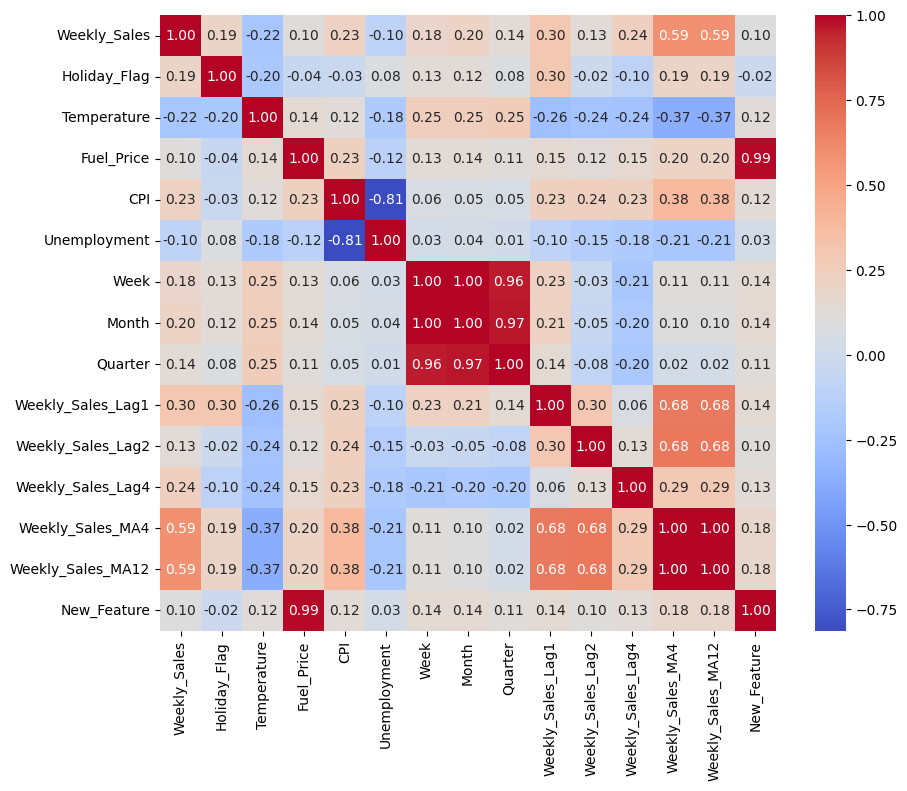

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def transformar_colunas_para_numerico(df, colunas):
    print(f'Colunas a serem transformadas: {colunas}')
    df_copy = df.copy()
    for coluna in colunas:
        df_copy[coluna] = pd.to_numeric(df_copy[coluna], errors='coerce')
    return df_copy

cols = ['Week', 'Month', 'Quarter']
df_processed = transformar_colunas_para_numerico(df_processed, cols)   

print(df_processed.info())

df_numeric = df_processed.select_dtypes(include=['float64', 'int64', 'int32', 'UInt32'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

In [35]:
#Salva data frame processado:
df_processed.to_csv(r'./Asset/sales_processed.csv', index=False)